In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [20]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v3"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170706 12_20 Family Types Log.xlsx',
 '20170706 12_20 FamilyCategory Log.xlsx',
 '20170706 12_20 FamilySubCategory Log.xlsx',
 '20170706 12_20 Host Families Log.xlsx',
 '20170706 12_20 Materials Log.xlsx',
 '20170706 12_20 Nested Families Log.xlsx',
 '20170706 12_20 OmniClass Log.xlsx',
 '20170706 12_20 Parameters Log.xlsx',
 '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 '20170706 12_20 Reference Planes Log.xlsx',
 '20170706 12_20 Units Log.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [21]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "Materials",
        "Nested Families",
        "Omniclass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'FamilyCategory': '20170706 12_20 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170706 12_20 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170706 12_20 Family Types Log.xlsx',
 'HostFamilies': '20170706 12_20 Host Families Log.xlsx',
 'Materials': '20170706 12_20 Materials Log.xlsx',
 'Nested Families': '20170706 12_20 Nested Families Log.xlsx',
 'Omniclass': '20170706 12_20 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170706 12_20 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170706 12_20 Parameters Log.xlsx',
 'ReferencePlanes': '20170706 12_20 Reference Planes Log.xlsx',
 'Units': '20170706 12_20 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path <b>\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content</b> is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [22]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def remove_rfaName(row):
    full_filepath = row.FamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def getFileType(row):
    return row.FamilyFilePath[-3:]

def stripFileType(row):
    return row.FamilyName[:-4]

95


# FAMILY CATEGORIES

<b>fc_path</b> and <b>fc</b> reads the data from the Family Categories excel file

In [23]:
fc_path = os.path.join(directory, file_dict["FamilyCategory"])
fc = pd.read_excel(fc_path)

fc["FamilyFilePath"] = fc.apply(remove_rfaName, axis=1)
fc["FamilyFilePath"] = fc.apply(stripCommonPath, axis=1)
fc.head()

,FamilyFilePath,FamilyName,Category
0,Windows\Structural,Window_Square Opening_WIN.rfa,Windows
1,Windows\Structural,Window_Round Opening_WIN.rfa,Windows
2,Windows\Special,Window Round_basic.rfa,Windows
3,Windows\Special,Window Lancet_basic.rfa,Windows
4,Windows\Special,Window Arched Top_basic.rfa,Windows


## No. of families in a Category

<b> fc_counts</b> will count the number of families there are in a category.

Note: This reported count will only be accurate if there is only one instance of the family in the FamilyName.

In [24]:
fc_counts = fc["Category"].value_counts()

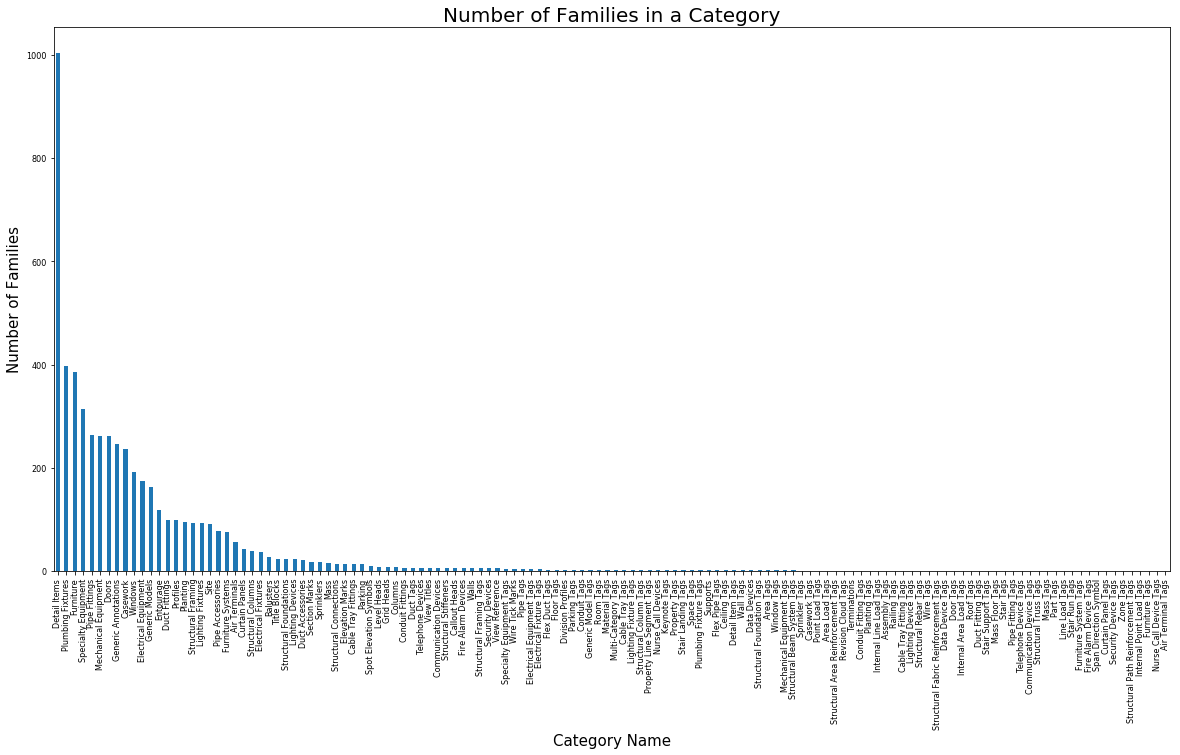

In [25]:
fc_counts.plot(kind="bar", fontsize = 8);
plt.title ("Number of Families in a Category", fontsize=20)
plt.xlabel("Category Name", fontsize = 15)
plt.ylabel("Number of Families", fontsize = 15)
plt.show()

## No. of families in a Category (Highest Offenders)

Use <b>cutoff</b> to filter the graph based on the number of families there are in a category.

e.g. cutoff > 15

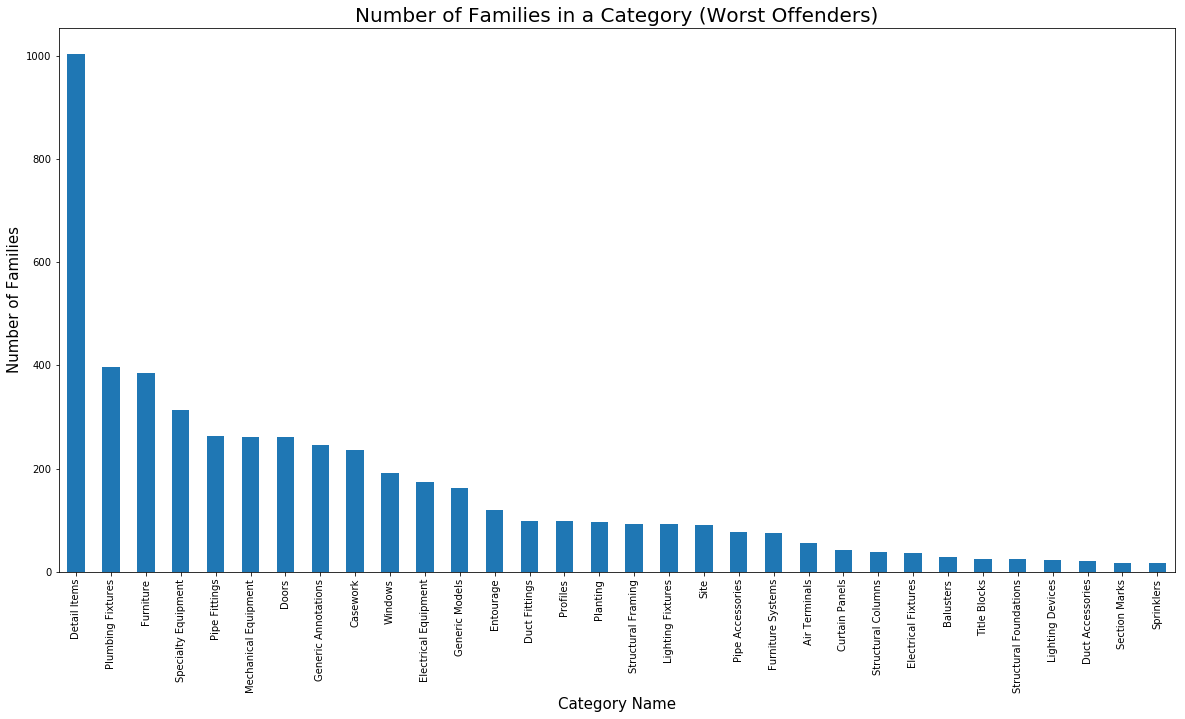

In [26]:
cutoff = 15

fc_counts[fc_counts>cutoff].plot(kind="bar");
plt.title ("Number of Families in a Category (Worst Offenders)", fontsize=20)
plt.xlabel("Category Name", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

## Filter and List No. of families in a Category

Use <b>fc_counts</b> to filter and list any high or low offenders.

In [27]:
fc_counts[fc_counts <= 2]

Property Tags                           2
Stair Landing Tags                      2
Space Tags                              2
Plumbing Fixture Tags                   2
Supports                                2
Flex Pipe Tags                          2
Ceiling Tags                            2
Detail Item Tags                        2
Wall Tags                               2
Data Devices                            2
Structural Foundation Tags              2
Area Tags                               2
Window Tags                             2
Mechanical Equipment Tags               2
Structural Beam System Tags             2
Sprinkler Tags                          1
Casework Tags                           1
Point Load Tags                         1
Area Load Tags                          1
Structural Area Reinforcement Tags      1
Revision Cloud Tags                     1
Terminations                            1
Conduit Fitting Tags                    1
Planting Tags                     